<a href="https://colab.research.google.com/github/kylemath/DeepEEG/blob/master/notebooks/DeepEEG_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DeepEEG


In [1]:
!git clone https://github.com/kylemath/DeepEEG
!chmod +x ./DeepEEG/install.sh
%cd DeepEEG
!./install.sh
from utils import *
%matplotlib inline
%cd ..

fatal: destination path 'DeepEEG' already exists and is not an empty directory.
/content/DeepEEG
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.0.3)


Using TensorFlow backend.


/content


#Simulate Data

In [8]:
raw,event_id = SimulateRaw(amp1 = 50, amp2 = 5, freq = 10, batch = 3)

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
Provided parameters will provide approximately 1022 events
Setting up raw simulation: 1 position, "cos2" interpolation
Blinks simulated 

#Run Preprocessing

plot_psd=False, filter_data=True,
eeg_filter_highpass=1, plot_events=False, epoch_time=(-.2,1),
baseline=(-.2,0), rej_thresh_uV=200, rereference=False, 
emcp_raw=False, emcp_epochs=False, epoch_decim=1, plot_electrodes=False,
plot_erp=False

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
2043 events found
Event IDs: [1 2]
Remaining Trials: 2040


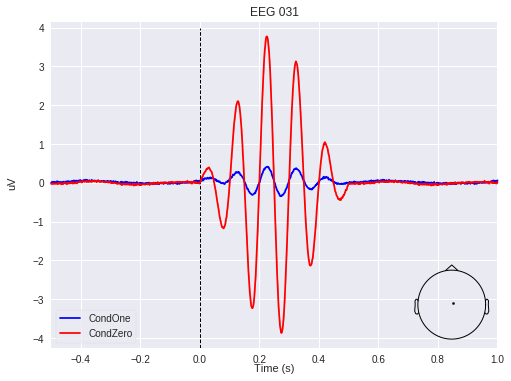

In [10]:
epochs = PreProcess(raw, event_id,filter_data=False,epoch_time = (-.5,1),plot_erp=True)                


#Plot Features:


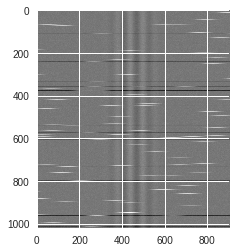

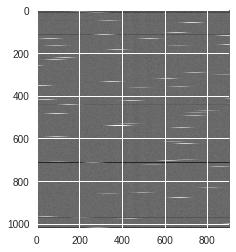

In [11]:
pick = 33
for event in event_id.keys():
  fig = plt.imshow(epochs[event]._data[:,pick,:])
  plt.show()

#Run FeatureEngineer

epochs, model_type='NN',
frequency_domain=False,
normalization=True, electrode_median=False,
wavelet_decim=1,flims=(3,30),
f_bins=20,wave_cycles=3,
spect_baseline=[-1,-.5],
electrodes_out=[11,12,13,14,15],
test_split = 0.2, val_split = 0.2,
random_seed=1017, watermark = False

In [13]:
feats = FeatureEngineer(epochs, model_type = 'NN',
                        frequency_domain=True, 
                        normalization= False,
                        flims=(5,20),spect_baseline=[-.5,0]
                        )

Constructing Frequency Domain Features
Computing Morlet Wavelets on cond0
Applying baseline correction (mode: mean)
Computing Morlet Wavelets on cond1
Applying baseline correction (mode: mean)
Condition one trials: 1020
cond1 Time Points: 601
cond1 Frequencies: 20
Condition zero trials: 1020
cond0 Time Points: 601
cond0 Frequencies: 20
Combined X Shape: (2040, 601, 100)
Combined Y Shape: (2040,)
Y Example (should be 1s & 0s): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X Range: -5.848621e-10:1.7628639e-09
Input Shape: (601, 100)
x_train shape: (1224, 601, 100)
1224 train samples
408 test samples
408 validation samples
Class Weights: [1.01492537 0.98550725]


# Run CreateModel

In [16]:
model, encoder = CreateModel(feats, units=[512,512])

Creating NN Model
Input shape: (601, 100)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 60100)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               30771712  
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_6 (Batch (None

# TrainTestVal

In [0]:
TrainTestVal(model, feats)

Training Model:
Train on 1224 samples, validate on 408 samples
Epoch 1/20
1224/1224 [==============================] - 28s 23ms/step - loss: 0.7122 - acc: 0.4828 - val_loss: 3.2405 - val_acc: 0.5392
Epoch 2/20
1224/1224 [==============================] - 27s 22ms/step - loss: 0.6972 - acc: 0.4886 - val_loss: 0.6963 - val_acc: 0.5392
Epoch 3/20
1224/1224 [==============================] - 27s 22ms/step - loss: 0.6964 - acc: 0.4943 - val_loss: 0.7213 - val_acc: 0.5392
Epoch 4/20
1224/1224 [==============================] - 26s 22ms/step - loss: 0.6939 - acc: 0.4926 - val_loss: 0.8309 - val_acc: 0.5392
Epoch 5/20
1224/1224 [==============================] - 26s 22ms/step - loss: 0.6938 - acc: 0.4853 - val_loss: 0.6964 - val_acc: 0.4608
Epoch 6/20
1224/1224 [==============================] - 26s 22ms/step - loss: 0.6936 - acc: 0.5049 - val_loss: 0.7018 - val_acc: 0.4608
Epoch 7/20
1224/1224 [==============================] - 26s 22ms/step - loss: 0.6937 - acc: 0.5016 - val_loss: 0.6901 - v